In [60]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
gis_dir = Path(r"G:\Shared Drives\UGS_Flux\Projects_and_Proposals\Castledale_ET\GIS")

In [35]:
df = pd.read_csv(gis_dir / "Zonal_Water_Volume_AcreFt_1999-01-01_2024-12-01.csv")
df['datetime'] = pd.to_datetime(df['datetime'])

df["dataset_band"] = df["dataset"] + "_" +df["band"]
df = df.set_index(["zonal_id","datetime","dataset_band"])#.unstack(level=0)
df = df.drop([".geo","system:index","band","dataset"],axis=1)
df = df.unstack(level=2)
df.columns = df.columns.droplevel(level=0)


In [40]:
 monthly = (
    df                         # your original DataFrame
      .groupby(level='zonal_id',)   # keep zonal_id intact
      .resample('ME', level='datetime')               # resample the datetime level to month-end
      .sum()                                         # aggregation of your choice
)

In [53]:
region = monthly.groupby("datetime").sum()

region = region.iloc[10:]#['OpenET_ssebop_et'].plot()


In [56]:
region['d_soil'] = region['TerraClimate_soil'].diff()

<Axes: xlabel='datetime'>

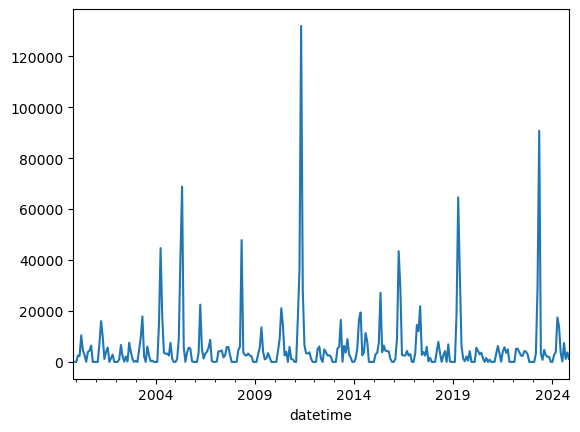

In [63]:

#plt.yscale("log")

<Axes: xlabel='datetime'>

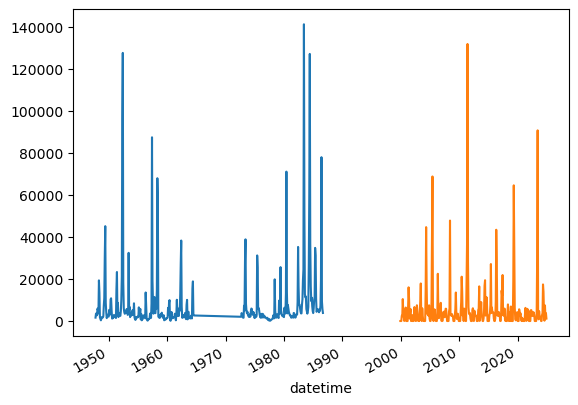

In [72]:
usgs = pd.read_csv("https://waterdata.usgs.gov/nwis/monthly?referred_module=sw&amp;site_no=09328000&amp;por_09328000_143145=448637,00060,143145,1947-10,1986-09&amp;format=rdb&amp;date_format=YYYY-MM-DD&amp;rdb_compression=value&amp;submitted_form=parameter_selection_list",
            comment='#',sep="\t",)
usgs = usgs.iloc[1:]
for col in ['year_nu','month_nu','mean_va']:
    usgs[col] = pd.to_numeric(usgs[col])
usgs['day'] = 1
usgs = usgs.rename(columns={"year_nu":"year","month_nu":"month"})
usgs['datetime'] = pd.to_datetime(usgs[['year','month','day']])
usgs['ac-ft'] = usgs['mean_va']*60.3307
usgs = usgs.set_index('datetime')
usgs['ac-ft'].plot()
region['TerraClimate_ro'].plot()